# Deep Reinforcement Learning

* [Deep Q Learning Nature Paper - Human-level control through deep reinforcement
learning](https://storage.googleapis.com/deepmind-media/dqn/DQNNaturePaper.pdf)
* [Target Network에 대한 자세한 Paper - CONTINUOUS CONTROL WITH DEEP REINFORCEMENT LEARNING](https://arxiv.org/pdf/1509.02971.pdf)
* [Playing Atari with Deep Reinforcement Learning](https://www.cs.toronto.edu/~vmnih/docs/dqn.pdf)


**Temporal Difference Learning**

* [An Introduction to Temporal Difference Learning](http://www.ias.informatik.tu-darmstadt.de/uploads/Teaching/AutonomousLearningSystems/Kunz_ALS_2013.pdf)
* [Temporal-Difference Learning](https://www.tu-chemnitz.de/informatik/KI/scripts/ws0910/ml09_6.pdf)

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Deep Q Network의 특징 

Q-network에서 neural network를 사용하면 DQN은 다음과 같은 특징을 통해 향상을 시켰습니다. 

1. Multi-layer convolutional network를 통해서 더 복잡한 문제를 해결함 
2. Experience Replay를 통해 더 stable한 모델을 만들수 있게 됨
3. target network 를 사용 (즉 2개의 neural network를 사용)

## Future Discounted Return 

Agent의 목표는 future reward를 최대치로 하는 actions을 선택하는 것입니다.<br>
여기서 future reward란 $ \gamma $ 배수만큼 (a factor of $ \gamma $ per time-step) discounted 되는 것을 의미합니다. <br>
쉽게 이야기해서 먼미래의 reward일수록, 더 적은 reward로 계산하겠다는 뜻입니다.

### $$ R_t = \sum^T_{t^{\prime} = t} \gamma^{t^{\prime} - t} r_{t^{\prime}} $$

$ T $는 게임이 끝나는 시점의 time-step을 의미하며 $ \gamma \in [0, 1] $ 의 값을 갖습니다.

아래의 코드에서는 gamma 값이 시간의 흐름에 따른 변화를 그렸습니다.<br>
먼 미래의 reward값일수록 0에 가까운 gamma값과 곱해야 하기 때문에<br>
코앞의 reward는 가중치가 높고, 먼 미래는 reward는 가중치가 낮게 됩니다.

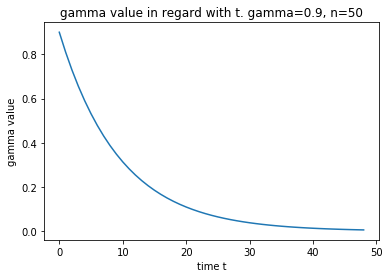

In [32]:
def gamma_values(gamma=0.9, n=50):
    return [gamma**i for i in range(1, n)]

plot(gamma_values())
title('gamma value in regard with t. gamma=0.9, n=50')
xlabel('time t')
ylabel('gamma value')

## Optimal action-value Function and Bellman Equation 

기본적으로 Reinforcement Learning의 목표는 expected return을 최대치로 하는 policy를 학습하는 것이며,<br>
아래의 공식과 같은 <span style="color:red">**Optimal action-value function $ Q^{*}(s, a) $**</span> 을 사용합니다. <br>
즉 어떤 특정 state $ s_t $ 에서 특정 action $ a_t $ 를 취했을때 얻게되는 expected return 을 나타냅니다.

$$ \begin{align}
Q^{*} (s, a) &= \max_{\pi} \mathbb{E} \left[ r_t + \gamma r_{t+1} + \gamma^2 r_{t+2} + ... \big|\ s_t =s, a_t = a, \pi \right] \\
&= \max_{\pi} \mathbb{E} \left[ R_t \big| \ s_t=s, a_t =a, \pi \right] 
\end{align} $$

Optimal Action-Value Function은  <span style="color:red">**Bellman Equation**</span>을 따릅니다. <br>
만약 optimal value $ Q^{*}(s^{\prime}, a^{\prime}) $ (여기서 $ s^{\prime} $는 next time-step의 state이고, $ a^{\prime} $는 모든 가능한 actions들을 말함) 의 값을 알고 있다면, <br>
expected value $ r + \gamma Q^{*}(s^{\prime}, a^{\prime}) $를 maximize 하는 action $ a^{\prime} $을 선택하는 것에 기초를 두고 있습니다.

$$ Q^{*} (s, a) = E_{s^{\prime} \sim \varepsilon} \left[ r + \gamma \max_{a^{\prime}} Q^{*} \left(s^{\prime}, a^{\prime}\right) \  \big| \ s, a \right] $$



## Nonlinear Approximator and Loss Function

기본적으로 많은 reinforcement learning algorithms들의 아이디어는 <br>
위의 Bellman Equation을 사용하여 iterative update로서 action-value function을 구하는 것입니다.<br>
다음은 Value Iteration같은 알고리즘같이 **iterative update**를 사용하는 공식. 

$$ Q_{i+1}(s, a) = 
\mathbb{E}_{s^{\prime}} \left[ r + \gamma \max_{a^{\prime}} Q^{*} \left( s^{\prime}, a^{\prime} \right) \big| \ s, a \right] $$

하지만 위의 공식은 각각의 sequence마다 action-value가 측정되며 일반화시키지 못합니다. <br>
따라서 **function approximator**를 사용하여 action-value function을 측정합니다.

$$ Q(s, a; \theta) \approx Q^{*} (s, a) $$

보통 Reinforcement Learning에서는 Linear function approximator를 사용하지만, <br>
Deep Q Learning에서는 Nonlinear function approximator인 뉴럴네트워크를 사용합니다.<br>
위의 공식에서 neural network function approximator로서 weights $ \theta $가 Q-network로 사용되었습니다.<br>
즉 Q-network는 parameters $ \theta $를 조정해가면서 학습이 진행됩니다.

Loss function은 mean-squared error를 사용합니다.<br>
이때 Bellman equation을 사용하게 되는데 target values $ r + \gamma \max_{a^{\prime}} Q^{*}\left(s^{\prime}, a^{\prime}\right) $ 이 부분을 <br>
approximate target values $ y = r + \gamma \max_{a^{\prime}} Q \left( s^{\prime}, a^{\prime}; \theta_{i-1} \right) $ 으로 대체시켜줍니다. 

최종적으로 <span style="color:red">**Loss function**</span>은 다음과 같습니다. 


$$ L_i (\theta_i) = \mathbb{E}_{s, a \sim p(\cdot)} $$

#### Experience Replay

학습시 Replay Memory에서 저장된 샘플 $ (s, a, r, s^{\prime}) \sim U(D) $  을 사용합니다.<br>
replay memory를 사용안하면 environment (Atari Game) 에서 현재 진행되고 있는 states들로만 학습이 이루어지며, 이는 왜곡된 학습을 할 수 있습니다. <br>
Replay Memory는 과거의 다양한 경험들을 사용해서 학습을 할 수 있도록 해줍니다.


#### Seperate Target Network 

RLNeural Network를 사용함에 






### Experience Replay and Loss Function

게임을 진행하면서 학습을 할 경우 observation sequence같의 연관성(correlation)때문에 학습이 제대로 안 될수 있습니다.<br>
연관성을 끊어주는 방법으로 experience replay를 사용합니다.

먼저 Agent의 experiences $ e_t = (s_t, a_t, r_t, s_{t+1} )$를 각각의 time-step마다 data set $ D_t = \{ e_1, e_2, ..., e_t \} $에 저장합니다.<br>
학습시 Q-Learning updates를 uniformly random으로 꺼내진 experiences $ (s, a, r, s^{\prime}) \sim U(D) $ 통해 실행하게 됩니다.<br>
Q-Learning update는 다음의 loss function을 사용하게 됩니다.

$$ L_i(\theta_i) = \mathbb{E}_{s, a, r, s^{\prime}} \sim U(D) \left[ \left( r + \gamma \max_{a^{\prime}} Q\left(s^{\prime}, a^{\prime}; \theta_{i-1}\right) - Q\left( s, a; \theta_i \right) \right)^2 \right] $$

위의 공식을 Differentiate하면 다음과 같은 결과를 얻습니다.

$$ \nabla $$

$$ \nabla_{\theta_i} L_i (\theta_i) = \mathbb{E}_ $$

### Deep Q-Learning with Experience Replay Algorithm

<img src="./images/deep-q-learning-algorithm.png">


### DDPG Algorithm

Deep Deterministic policy gradient를 뜻하며 target network의 알고리즘을 포함하고 있습니다.

<img src="./images/ddpg.png">



# Code

In [1]:
%pylab inline
import gym
import numpy as np
import torch
import cv2

from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.autograd import Variable
from torchvision import transforms as T

from PIL import Image

Populating the interactive namespace from numpy and matplotlib


### Experience Replay

Nature에 실린 paper에 따르면.. Experience Replay 또는 Memory Replay라고 하며,<br>
각 time-step마다 Agent's experiences를 다음과 같이 저장을 합니다. 

$$ \begin{align}
e_t &= (s_t, a_t, r_t, s_{t+1}) \\
D_t &= \{e_1, ..., e_t\}
\end{align} $$

여러개의 episodes의 experiences를 갖고 있습니다. <br>
episode란 예를 들어 게임 한 번을 실행하여 terminal state에 도달하게 된 것을 의미하는데, <br>
여러번의 게임 경험을 experience replay에서 갖고 있다는 뜻입니다.

In [15]:
class ReplayMemory(object):
    def __init__(self, size=10000):
        self.size = size
        
replay = ReplayMemory()

### Q-Network

Input으로는 전처리 $ \phi $를 거친  84 x 84 x 4 images를 받으며 deep convolutional neural network를 사용합니다.<br>
output의 갯수는 actions의 갯수가 되어야 하며, 이미지의 위치를 유지하기 위하여 pooling은 사용하지 않습니다.<br>
(예를 들어, 막대기 세우기 게임에서는 $ Q(s, \text{left}) $ 그리고 $ Q(s, \text{right}) $ 가 되어야 합니다.

> nn.Conv2d는 $ (N, C_{in}, H, W) $ 의 형태로 이미지를 받아야 합니다.

In [19]:
class DQN(nn.Module):
    def __init__(self, n_action):
        super(DQN, self).__init__()
        self.n_action = n_action
        
        self.conv1 = nn.Conv2d(3, 16, kernel_size=20, stride=2) # (In Channel, Out Channel, ...)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=9, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, stride=2)
        
        self.bn1 = nn.BatchNorm2d(16)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.affine1 = nn.Linear(512, self.n_action)
        
    def forward(self, x):
        h = F.leaky_relu(self.bn1(self.conv1(x)))
        h = F.leaky_relu(self.bn2(self.conv2(h)))
        h = F.leaky_relu(self.bn3(self.conv3(h)))
        out = self.affine1(h.view(h.size(0), -1))
        return out

### Environment

In [4]:
env = gym.make('CartPole-v0')
env.reset()
print('observation space:', env.observation_space.shape)
print('action space:', env.action_space.n)
screen = env.render(mode='rgb_array')
print('screen', screen.shape)

[2017-05-10 23:28:04,824] Making new env: CartPole-v0


observation space: (4,)
action space: 2
screen (400, 600, 3)


In [5]:
env.step(1)
env.close()

In [6]:
screen

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ..., 
       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [255, 255, 255],
        [255, 255, 255],
        [255, 255,

In [25]:
GAME_NAME = 'CartPole-v0'

class Environment(object):
    def __init__(self, game, width=84, height=84):
        self.game = gym.make(game)
        self.width = width
        self.height = height
        self._toTensor = T.Compose([T.ToPILImage(), T.ToTensor()])
    
    def play_sample(self):
        observation = self.game.reset()
        while True:
            screen = self.game.render(mode='rgb_array')
            screen = self.preprocess(screen)
            action = self.game.action_space.sample()
            observation, reward, done, info = self.game.step(action)
            if done:
                break
        self.game.close()
        
    def preprocess(self, screen):
        preprocessed = cv2.resize(screen, (self.height, self.width)) # 84 * 84 로 변경
        preprocessed = preprocessed.transpose((2, 0, 1)) # (C, W, H) 로 변경
        return preprocessed
    
    def init(self):
        """
        @return observation
        """
        return self.game.reset()
    
    def get_screen(self):
        screen = self.game.render(mode='rgb_array')
        screen = self.preprocess(screen)
        return screen
    
    def toVariable(self, x):
        return Variable(self._toTensor(x).cuda())
    
    @property
    def action_space(self):
        return self.game.action_space.n
    
    
    
env = Environment(GAME_NAME)
env.play_sample()

[2017-05-12 09:45:44,739] Making new env: CartPole-v0


### Agent

In [28]:
INITIAL_EPSILON = 1.0
FINAL_EPSILON = 0.05
EXPLORATION_STEPS = 1000000

class Agent(object):
    def __init__(self, cuda=True):
        # Environment
        self.env = Environment(GAME_NAME)
        
        # DQN Model
        self.dqn = DQN(self.env.action_space)
        if cuda:
            self.dqn.cuda()
        self.optimizer = optim.RMSprop(self.dqn.parameters(), lr=0.0025)
        
        # Replay Memory 
        self.replay_momory = ReplayMemory()
        
        # Epsilon
        self.epsilon = INITIAL_EPSILON
        self.epsilon_step = (INITIAL_EPSILON - FINAL_EPSILON) / EXPLORATION_STEPS # 9.499999999999999e-07
    
    def train(self):
        pass
        
        
agent = Agent()

[2017-05-12 09:51:04,044] Making new env: CartPole-v0


### Training

In [9]:
class